In [1]:
import pandas as pd
import numpy as np
# import snscrape.modules.twitter as ts
# import snscrape.modules.reddit as snredt
# from tqdm.notebook import tqdm
from time import sleep
import math
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import re
import warnings

warnings.simplefilter('ignore')

In [3]:

chunks = pd.read_csv(r"C:\Users\abume\Downloads\Bitcoin_tweets\Bitcoin_tweets.csv", chunksize=100000,lineterminator='\n', index_col=0)
df = pd.concat(chunks)
df.head()

,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
user_name,,,,,,,,,,,,
DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [10]:
raw_df = pd.read_parquet(r"C:\Users\abume\Downloads\Bitcoin_tweets\tweeets_text_date.parquet")
raw_df.head()

,date,text
user_name,,
DeSota Wilson,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
CryptoND,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
Tdlmatias,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
Crypto is the future,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [12]:
# df.drop(df[df['user_followers'] == ' Laptops and more."'].index, inplace=True)
# df.reset_index(inplace=True)

tweets = raw_df.copy() #df[['date', 'text']]
tweets.set_index('date', inplace=True)
tweets.head()

,text
date,
2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [7]:
tweets.isna().sum()

text    0
dtype: int64

No missing values in tweets dataframe.

In [ ]:
# create hashes as tweet ids using md5
from hashlib import md5
hash = md5()

def hash_value(x):
    hash.update(x.encode())
    return hash.hexdigest()

Next, convert the datetime strinng to datetime object

In [ ]:

try:
    tweets.index = pd.to_datetime(tweets.index, errors='coerce')
except (pd.errors.ParserError, ValueError):
    pass

tweets.dropna(subset=tweets.index, inplace=True)


In [13]:
tweets.index = pd.to_datetime(tweets.index)

In [ ]:
# tweets.to_parquet(r"C:\Users\abume\Downloads\Bitcoin_tweets\tweeets_text_date.parquet", engine='fastparquet')

In [14]:
tweets.shape

(4689288, 1)

In [17]:
print(f"{df.shape[0] - tweets.shape[0]} rows removed from original tweets dataframe")

66 rows removed from original tweets dataframe


In [ ]:
# def clean_text(text):
#     # # remove punctuations
#     # text = "".join([char for char in text if char not in string.punctuation]).lower()
#     # # text to lowercase
#     # text = text.split()
#     # # lematize each word in text and return a list of lematized words
#     # return [wnl.lemmatize(word) for word in text if word not in stopwords_list]
#     wnl = WordNetLemmatizer()
#     text = re.sub(r"#\w+\s*", "", str(text))
    
#     # remove punctuations
#     text = "".join([char for char in text if char not in string.punctuation]).lower()
#     # tokenize
#     tokens = re.split('\W+', text)
#     # remove stopwords, lematize and return
#     return " ".join([wnl.lemmatize(word).strip() for word in tokens if word not in stopwords.words('english')])

In [ ]:
# sample.reset_index(drop=True, inplace=True)
# sample['clean'] = sample['text'][:10000].apply(lambda x: clean_text(x))

In [21]:
import warnings
warnings.simplefilter('ignore')

In [28]:
import torch
from torch.nn.functional import softmax
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest" #'cardiffnlp/twitter-roberta-base-sentiment'

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

def get_sentiment(text):
    # Tokenize and encode the text
    encoded_input = tokenizer(text, return_tensors="pt", padding=True)

    # Get the sentiment prediction from the model
    outputs = model(**encoded_input)
    prediction_scores = outputs.logits  # prediction scores for sentiment classes
    scores = softmax(prediction_scores)
 
    # Get the predicted sentiment class (index of the highest score)
    sentiment = prediction_scores.argmax(axis=1).detach().numpy()  # and convert to NumPy array
    return sentiment[0]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
def score_sentiment(text):
    tokens = tokenizer.encode(text,
                              padding=True,
                              truncation=True,
                              max_length=512,
                              return_tensors='pt')
    results = model(tokens)
    score = int(torch.argmax(results.logits)) + 1
    
    return score

In [42]:
sentiment = pd.read_parquet(r"C:\Users\abume\Downloads\Bitcoin_tweets\tweeets_text_sentiment.parquet")

([<matplotlib.patches.Wedge at 0x2577fb3f310>,
 [Text(-1.0280990142389619, 0.39116801622943953, ''),
  Text(1.0011743008482579, -0.4556863168024716, ''),
  Text(1.0977783886349533, -0.06987567134593893, '')])

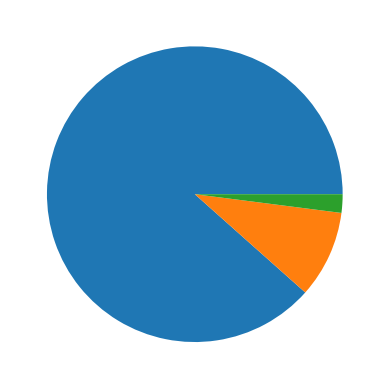

In [34]:
plt.pie(sent['sentiment'].value_counts())

In [ ]:
# texts = [
#     "I love this movie!",
#     "It's a beautiful day.",
#     "This restaurant is terrible.",
#     "I feel so happy.",
#     "I'm really disappointed with the service.",
# ]

In [35]:
# tweets['sentiment_score'] = tweets['text'].apply(lambda x: get_sentiment(x))  #6850min

In [36]:
from CryptoFinance import CryptoScraper as cs

In [38]:
cache_explorer = cs.CacheExplorer(currency='BTC', period='730d')
df = cache_explorer.get_currency_history()
df.head()

,_id,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922,0.0,0.0,0.0
1,2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203,0.0,0.0,0.0
2,2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172,0.0,0.0,0.0
3,2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031,87914496.0,0.0,0.0
4,2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062,96643072.0,0.0,0.0


In [39]:
df['datetime'] = df['_id']
df.set_index(df['datetime'], inplace=True)
df.index = pd.to_datetime(df.index, infer_datetime_format=True)
df.head()

,_id,Open,High,Low,Close,Volume,Dividends,Stock Splits,datetime
datetime,,,,,,,,,
2021-08-03 00:00:00+00:00,2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922,0.0,0.0,0.0,2021-08-03 00:00:00+00:00
2021-08-03 01:00:00+00:00,2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203,0.0,0.0,0.0,2021-08-03 01:00:00+00:00
2021-08-03 02:00:00+00:00,2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172,0.0,0.0,0.0,2021-08-03 02:00:00+00:00
2021-08-03 03:00:00+00:00,2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031,87914496.0,0.0,0.0,2021-08-03 03:00:00+00:00
2021-08-03 04:00:00+00:00,2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062,96643072.0,0.0,0.0,2021-08-03 04:00:00+00:00


In [40]:
btc = df[['Open', 'High', 'Low', 'Close']]
btc.head()

,Open,High,Low,Close
datetime,,,,
2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922
2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203
2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172
2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031
2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062


In [55]:
sentiment.head(20)

,text,sentiment
date,,
2021-02-05 10:51:00+00:00,#Bitcoin and #ETH both have bullish setups for...,2
2021-02-05 10:54:00+00:00,$PERL 0.06.\nI have insisted that since 0.02 i...,2
2021-02-05 10:57:00+00:00,"#Bitcoin braces for $48,000 as inverse head-an...",1
2021-02-05 11:00:00+00:00,1 BTC Price: Bitstamp 37475.23 USD Coinbase U...,1
2021-02-05 11:03:00+00:00,We are gaining pace with more and more institu...,2
2021-02-05 11:06:00+00:00,To-do or not To-do. #crypto #btc #Bitcoin #E...,1
2021-02-05 11:09:00+00:00,🔄 Prices update in $USD (1 hour):\n\n$BTC - 37...,1
2021-02-05 11:12:00+00:00,There may be other currencies like it that may...,2
2021-02-05 11:15:00+00:00,#bitcoin #ATH is ~2x since last #ATH. #CARDANO...,1


In [61]:
import pandas as pd

# Load your btc and tweet data
# ...
# sentiment.index = sentiment.index.tz_localize('UTC')


# Merge the data on the 'date' column
merged_data = btc.merge(sentiment, how='outer', left_index=True, right_index=True)
# merged_data = btc.merge_asof(sentiment, left_index=True, right_index=True, direction='nearest')
# Resample to hourly intervals and aggregate sentiment counts
hourly_data = merged_data.resample('H').agg({'sentiment': lambda x: x.value_counts().index[0] if not x.empty else None})
# hourly_data = merged_data.resample('H').agg({'sentiment': lambda x: x.value_counts().index[0] if not x.empty else None})

hourly_data

IndexError: index 0 is out of bounds for axis 0 with size 0

In [50]:
sentiment.index = sentiment.index.tz_localize('UTC')

In [69]:
data = pd.merge(btc, sentiment, how='outer', left_index=True, right_index=True)
check = data.resample('H')

In [70]:
check.dropna()

,Open,High,Low,Close,sentiment
2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922,1.00
2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203,1.00
2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172,1.00
2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031,1.00
2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062,1.00
...,...,...,...,...,...
2023-01-09 19:00:00+00:00,14236.488281,14236.488281,14195.312500,14195.312500,1.05
2023-01-09 20:00:00+00:00,14192.876953,14195.422852,14126.580078,14128.775391,1.05
2023-01-09 21:00:00+00:00,14130.629883,14159.559570,14106.828125,14107.657227,1.25
2023-01-09 22:00:00+00:00,14108.405273,14140.638672,14104.168945,14123.494141,1.15


In [73]:
data['sentiment'].value_counts()

1.0    298622
2.0     32248
0.0      6833
Name: sentiment, dtype: int64

In [ ]:
# tweets.to_csv('sentiment_tweets.csv', index=False, header=False)
# tweets.to_parquet(r"C:\Users\abume\Downloads\Bitcoin_tweets\Bitcoin_tweets.parquet", engine='fastparquet')


In [ ]:
# scored_tweets = pd.read_parquet(r"C:\Users\abume\Downloads\Bitcoin_tweets\Bitcoin_tweets_main.parquet", engine='fastparquet')
# scored_tweets.head()

In [ ]:
# pd.plotting.register_matplotlib_converters()
# # data.index = pd.to_datetime(data.index)

# selected = ['sentiment_score']


# # data[selected].plot.line(linewidth=0.5, figsize=(8, 8))
# plt.figure(figsize=(16, 8))
# plt.plot(sampled_tweets[selected], linewidth=0.5)
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Sentiment Score', fontsize=18)
# plt.title('Bitcoin Tweets Sentiment over Time', fontsize=20)
# plt.legend(selected, loc='best')
# plt.show()
